### Test


In [1]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
sys.path.append("..")
from lpp_utils import *
from nilearn import datasets, plotting
import nilearn.connectome
from scipy.spatial.distance import squareform
from statsmodels.stats.multitest import multipletests


In [3]:
result_within = []
result_across = []

n_perm = 1
print(n_perm)

result_all_runs = []
curr_target_size = 2772

data_fr = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/fr_fmriall_resampled.npy")
data_cn = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/cn_fmriall_resampled.npy")
data_en = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri_resampled/en_fmriall_resampled.npy")
    
n_regions =   data_fr.shape[1]
print(n_regions)
    
all_data = np.concatenate([data_fr, data_cn, data_en], axis =2)

result_all = lpp_isc(all_data[:,:,:], pairwise=True)  
result_within_lang = np.zeros((n_regions,1))
result_across_lang = np.zeros((n_regions,1))

surr_result_within_lang = np.zeros((n_perm, n_regions))
surr_result_across_lang = np.zeros((n_perm, n_regions))

observed_all, distribution = phaseshift_isc_pairwise(all_data[: ,:,:], 
                                           pairwise=True,
                                           summary_statistic= None,
                                           n_shifts= n_perm)

1
293
Assuming 110 subjects with 2772 time points and 293 voxel(s) or ROI(s).


In [4]:
all_data.shape

(2772, 293, 110)

89


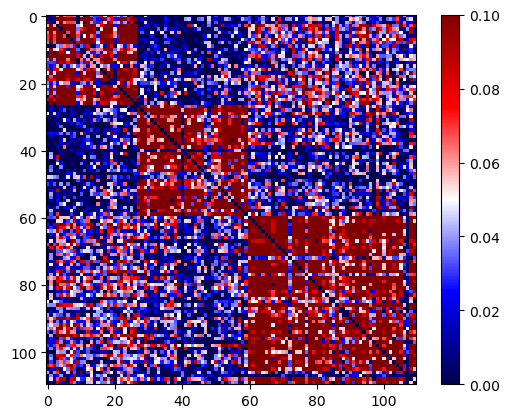

In [10]:
curr_region = 89

print(curr_region)
resmat = squareform(observed_all[:,curr_region])
resmat.shape

plt.imshow(resmat, vmin = 0, vmax = 0.1, cmap = 'seismic'); plt.colorbar()

In [11]:
        print(curr_region)
        resmat = squareform(observed_all[:,curr_region])

        w_f = nilearn.connectome.sym_matrix_to_vec(resmat[0:27, 0:27], discard_diagonal=True)
        w_c = nilearn.connectome.sym_matrix_to_vec(resmat[27:60, 27:60], discard_diagonal=True)
        w_e = nilearn.connectome.sym_matrix_to_vec(resmat[60:110, 60:110], discard_diagonal=True)
        
        a_ec = resmat[27:60, 0:27].flatten()
        a_fc = resmat[60:110, 0:27].flatten()
        a_ef = resmat[60:110, 27:60].flatten()

        result_within_lang[curr_region] = np.concatenate([w_f, w_c, w_e]).mean()
        result_across_lang[curr_region] = np.concatenate([a_ec, a_fc, a_ef]).mean() 

89


In [14]:
np.concatenate([w_f, w_c, w_e]).mean()

0.10566617506248423

In [15]:
np.concatenate([a_ec, a_fc, a_ef]).mean() 

0.023444859160619568

In [17]:
from nltools.stats import isc as newisc

